In [1]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=2c886e8ff607931f8dc42ee949763b2378d4f1ff93f20a5d8ce6f31a5eb55ee0
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


In [2]:
import dlib
from google.colab.patches import cv2_imshow
import face_recognition
import cv2
#import os
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image , ImageDraw


from tensorflow.keras.models import load_model
#from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
#from tensorflow.keras.preprocessing import image 
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
#from google.colab.patches import cv2_imshow

In [9]:
model = load_model("./my_model_version_final_bon.h5")

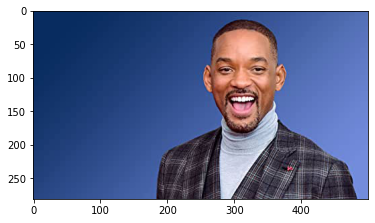

-------------------------------------------------------------------------------------------------------------------------


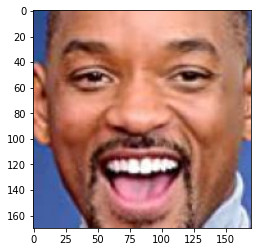

1/1 [==============================] - 0s 102ms/step
[[9.3368662e-08 4.9109340e-06 8.4166270e-04 5.6020188e-05 1.0801268e-07
  2.6501160e-02 1.7436069e-08 2.5100677e-05 3.0580193e-08 1.5168614e-04
  7.9543708e-05 4.3095101e-02 8.5921865e-06 9.2923599e-01]]
92.92359948158264 %
Will Smith


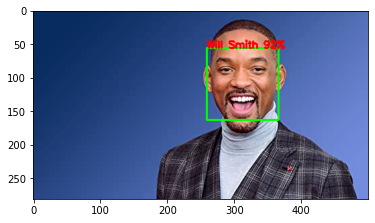

In [13]:
names = ['Angelina Jolie', 'Brad Pitt', 'Hugh Jackman', 'Jennifer Lawrence', 'Kate Winslet', 'Leonardo DiCaprio', 'Megan Fox', 'Natalie Portman', 'Nicole Kidman', 'Robert Downey Jr', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks', 'Will Smith']
#image contain more than face
image_Input = face_recognition.load_image_file('./will_smith.jpeg')
#face contain one face
#individual_face = face_recognition.load_image_file("./YassineBounou.jpg")
# Detect the face locations in the image


#face location variable is like an array contain faces
face_locations = face_recognition.face_locations(image_Input)
# Iterate over the face locations
for i, face_location in enumerate(face_locations):
    # Get the coordinates of the face
    top, right, bottom, left = face_location

    # Extract the face from the image
    face_image = image_Input[top:bottom, left:right]

    # Convert the face image to a Pillow Image object
    #
    face_image = cv2.resize(face_image, (170, 170))
    # Save the face image to a file
    face_image = Image.fromarray(face_image)
    #cv2.imwrite("face_found_{}.jpg".format(i), face_image)
    face_image.save("face_found_{}.jpg".format(i))

plt.imshow(image_Input)
plt.show()
print("-------------------------------------------------------------------------------------------------------------------------")
image_array = Image.fromarray(image_Input)
draw = ImageDraw.Draw(image_array)  # Create an ImageDraw object
for i ,(top, right, bottom, left)in enumerate(face_locations):
    new_data=cv2.imread("face_found_{}.jpg".format(i))
    new_data=cv2.cvtColor(new_data,cv2.COLOR_BGR2RGB)
    plt.imshow(new_data)
    plt.show()
    predict_image=np.expand_dims(new_data, axis=0)
    predict = model.predict(predict_image)
    print(predict)
    #return the index of the max predict
    class_idx = np.argmax(predict)
    #the classe name 
    class_name = names[class_idx]
    max_prob = np.max(predict)*100
    print(max_prob,"%")
    text = class_name +" "+str(int(np.max(predict)*100) ) +"%"
    #add text to the image
    cv2.rectangle(image_Input,(left,top),(right, bottom),(0, 255, 0),thickness=2)  
    cv2.putText(image_Input, text, (left, top), cv2.FONT_HERSHEY_SIMPLEX  , 0.5, (255, 0, 0), 2)
    print(class_name)
plt.imshow(image_Input)

In [12]:

# Open the video
video_capture = cv2.VideoCapture("./Tom_hanks.mp4")

# Get the frames per second (fps) of the original video
fps = video_capture.get(cv2.CAP_PROP_FPS)

# Define the codec and create a video writer object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (int(video_capture.get(3)), int(video_capture.get(4))))
while True:
    # Get a frame from the video
    ret, frame = video_capture.read()

    # Exit the loop if the video has ended
    if not ret:
        break

    # Find the face locations and encodings in the frame
    face_locations = face_recognition.face_locations(frame)
    
    for i ,(top, right, bottom, left)in enumerate(face_locations):
        print('work!')
        face_image = frame[top:bottom, left:right]
        face_image = cv2.resize(face_image, (170, 170))
        predict_image=np.expand_dims(face_image, axis=0)
        predict = model.predict(predict_image)
        #return the index of the max predict
        class_idx = np.argmax(predict)
        #the classe name 
        class_name = names[class_idx]
        print(class_name)
        text = class_name +" "+str(int(np.max(predict)*100) ) +"%"
        #add text to the frame 
        cv2.rectangle(frame,(left,top),(right, bottom),(0, 255, 0),thickness=2)  
        cv2.putText(frame, text, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Write the frame to the output video
    out.write(frame)

    # Show the frame
    #cv2_imshow( frame)

    # Exit the loop if the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture
video_capture.release()
out.release()

# Close all open windows
cv2.destroyAllWindows()



work!
1/1 [==============================] - 0s 22ms/step
Kate Winslet
work!
1/1 [==============================] - 0s 27ms/step
Kate Winslet
work!
1/1 [==============================] - 0s 111ms/step
Kate Winslet
work!
1/1 [==============================] - 0s 28ms/step
Kate Winslet
work!
1/1 [==============================] - 0s 19ms/step
Kate Winslet
work!
1/1 [==============================] - 0s 19ms/step
Leonardo DiCaprio
work!
1/1 [==============================] - 0s 31ms/step
Leonardo DiCaprio
work!
1/1 [==============================] - 0s 20ms/step
Leonardo DiCaprio
work!
1/1 [==============================] - 0s 41ms/step
Tom Hanks
work!
1/1 [==============================] - 0s 19ms/step
Tom Hanks
work!
1/1 [==============================] - 0s 23ms/step
Tom Hanks
work!
1/1 [==============================] - 0s 19ms/step
Tom Hanks
work!
1/1 [==============================] - 0s 24ms/step
Kate Winslet
work!
1/1 [==============================] - 0s 22ms/step
Kate Winslet
wo